In [3]:
name <- c('山田太郎','鈴木花子','高橋次郎','佐藤三郎')
math <- c(90,80,75,88)
english <- c(50,70,80,65)
score <- data.frame(氏名=name,数学=math,英語=english)
score
dim(score)
nrow(score)
ncol(score)
score$数学
score[,2]
score[score$数学>80,]
score[score$数学>80,c('氏名','数学')]

氏名,数学,英語
<chr>,<dbl>,<dbl>
山田太郎,90,50
鈴木花子,80,70
高橋次郎,75,80
佐藤三郎,88,65


[1] 4 3

[1] 4

[1] 3

[1] 90 80 75 88

[1] 90 80 75 88

,氏名,数学,英語
,<chr>,<dbl>,<dbl>
1,山田太郎,90,50
4,佐藤三郎,88,65


,氏名,数学
,<chr>,<dbl>
1,山田太郎,90
4,佐藤三郎,88


In [2]:
library(dplyr)
score %>% filter(数学 > 80) %>% select(氏名,数学)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




氏名,数学
<chr>,<dbl>
山田太郎,90
佐藤三郎,88


In [6]:
kokusei <- read.csv('data/02/c01.csv',fileEncoding='sjis',stringsAsFactors=FALSE)
head(kokusei)

,都道府県コード,都道府県名,元号,和暦.年.,西暦.年.,注,人口.総数.,人口.男.,人口.女.
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,00,全国,大正,9,1920,,55963053,28044185,27918868
2,01,北海道,大正,9,1920,,2359183,1244322,1114861
3,02,青森県,大正,9,1920,,756454,381293,375161
4,03,岩手県,大正,9,1920,,845540,421069,424471
5,04,宮城県,大正,9,1920,,961768,485309,476459
6,05,秋田県,大正,9,1920,,898537,453682,444855


In [7]:
tail(kokusei)

,都道府県コード,都道府県名,元号,和暦.年.,西暦.年.,注,人口.総数.,人口.男.,人口.女.
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
977,44,大分県,平成,27,2015,,1166338,551932,614406
978,45,宮崎県,平成,27,2015,,1104069,519242,584827
979,46,鹿児島県,平成,27,2015,,1648177,773061,875116
980,47,沖縄県,平成,27,2015,,1433566,704619,728947
981,1) 沖縄県は調査されなかったため，含まれていない。,,,NA,NA,,,,
982,2) 長野県西筑摩群山口村と岐阜県中津川市の境界紛争地域人口（男39人，女34人）は全国に含まれているが，長野県及び岐阜県のいずれにも含まれていない。,,,NA,NA,,,,


In [8]:
kokusei <- na.omit(kokusei)
h27 <- kokusei[kokusei$西暦.年. == 2015,]
h27_pref <- h27[
    (h27$都道府県コード != '00') &
    (h27$都道府県コード != '0A') &
    (h27$都道府県コード != '0B') ,
]
nrow(h27_pref)

[1] 47

In [9]:
h27_population <- as.integer(h27_pref$人口.総数.)
table(h27_population %/% 1000000)


 0  1  2  3  5  6  7  8  9 13 
 9 21  7  1  3  1  2  1  1  1 

In [10]:
log2(47)+1

[1] 6.554589

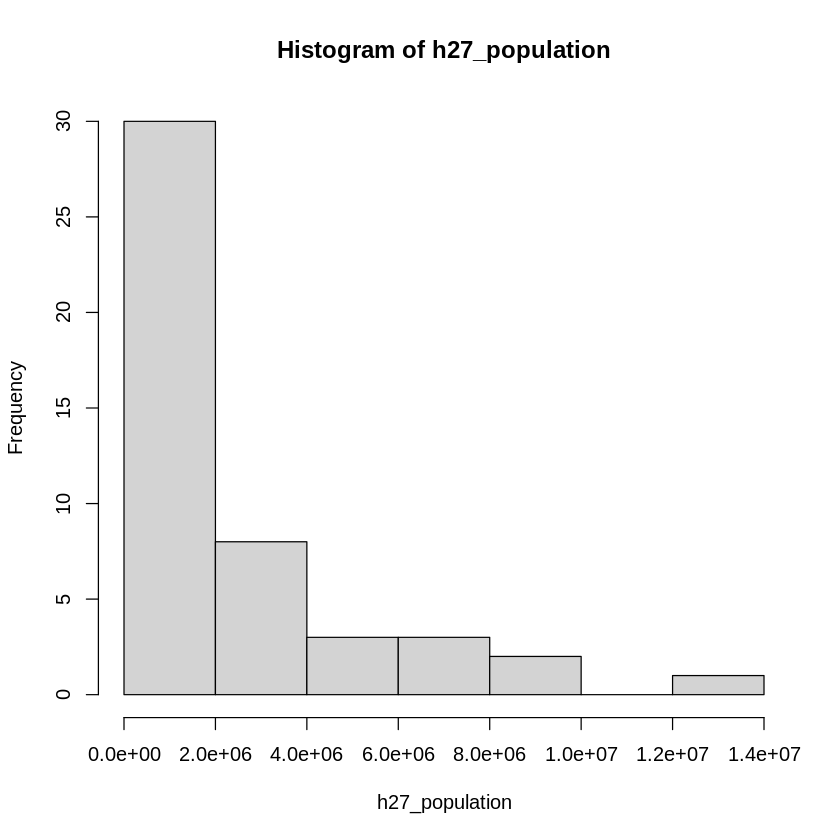

In [11]:
hist(h27_population)

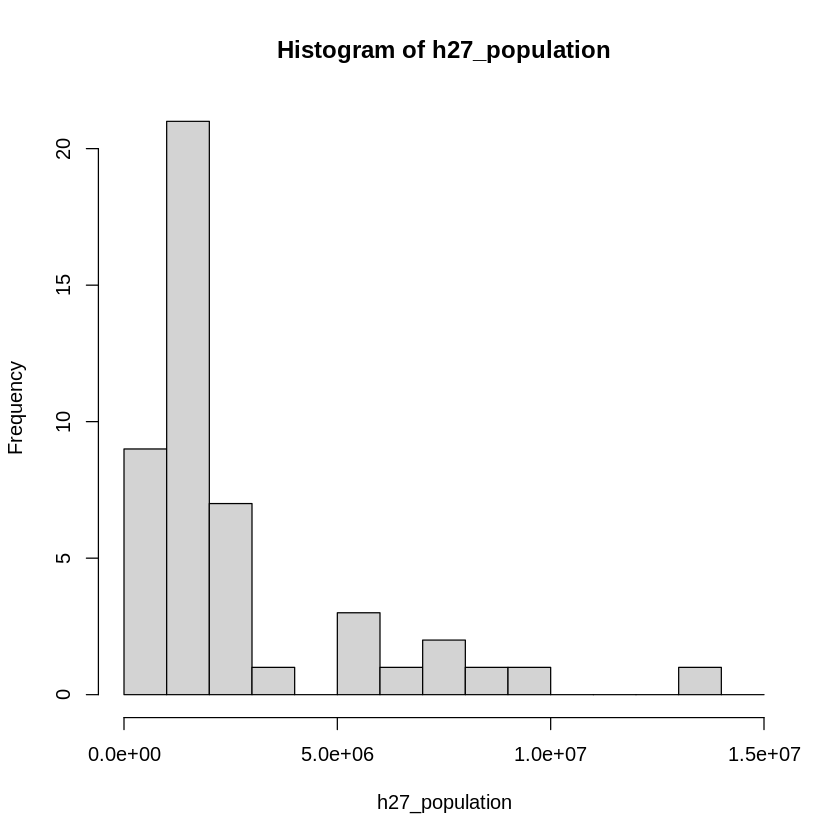

In [12]:
hist(h27_population,breaks=seq(0,15000000,1000000))

$breaks
 [1] 0.0e+00 1.0e+06 2.0e+06 3.0e+06 4.0e+06 5.0e+06 6.0e+06 7.0e+06 8.0e+06
[10] 9.0e+06 1.0e+07 1.1e+07 1.2e+07 1.3e+07 1.4e+07 1.5e+07

$counts
 [1]  9 21  7  1  0  3  1  2  1  1  0  0  0  1  0

$density
 [1] 1.914894e-07 4.468085e-07 1.489362e-07 2.127660e-08 0.000000e+00
 [6] 6.382979e-08 2.127660e-08 4.255319e-08 2.127660e-08 2.127660e-08
[11] 0.000000e+00 0.000000e+00 0.000000e+00 2.127660e-08 0.000000e+00

$mids
 [1]   500000  1500000  2500000  3500000  4500000  5500000  6500000  7500000
 [9]  8500000  9500000 10500000 11500000 12500000 13500000 14500000

$xname
[1] "h27_population"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

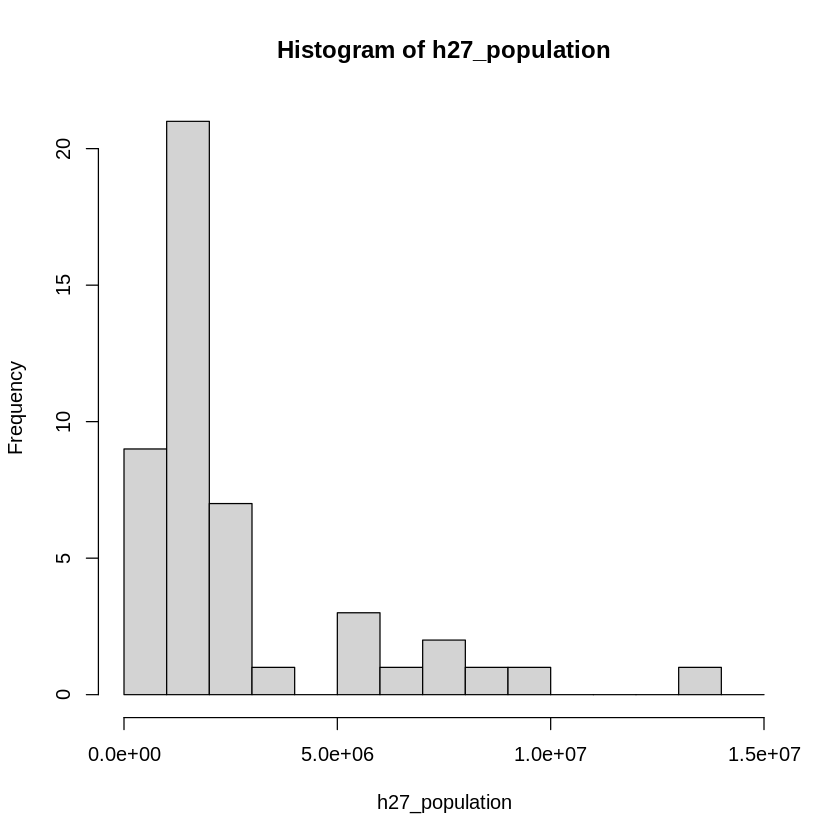

In [13]:
dist = hist(h27_population,breaks=seq(0,15000000,1000000))
dist

In [14]:
sum(h27_population)

[1] 127094745

In [15]:
total <- sum(h27_population)
total / length(h27_population)

[1] 2704144

In [16]:
mean(h27_population)

[1] 2704144

In [17]:
median(h27_population)

[1] 1648177

In [18]:
data <- c(58,67,61,80,55,72,69,74)
m <- mean(data)
sum((data - m)**2) / length(data)

[1] 63.5

In [19]:
var(data)

[1] 72.57143

In [20]:
h27_mean = mean(h27_population)
sqrt(sum((h27_population - h27_mean) ** 2) / length(h27_population))

[1] 2699508

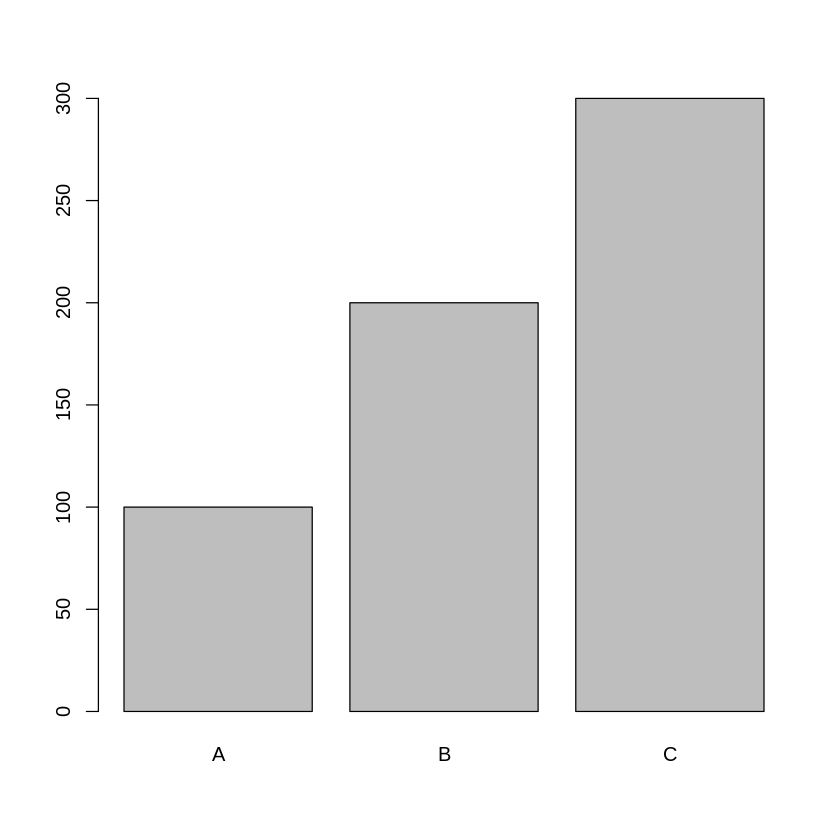

In [22]:
barplot(
    c(100,200,300),
    names.arg = c('A','B','C')
)

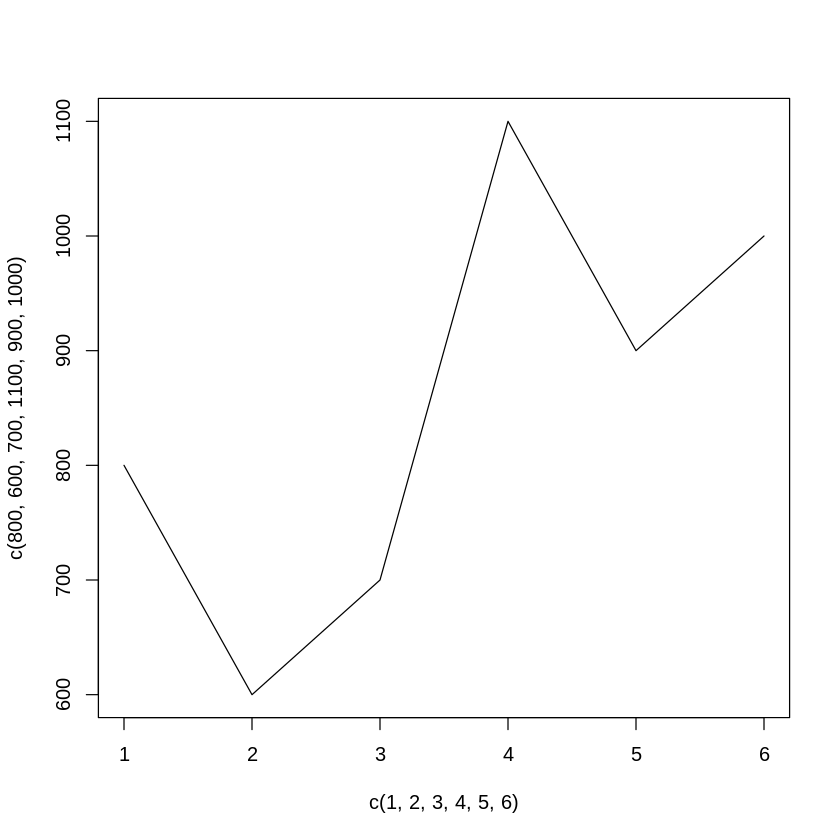

In [23]:
plot(
    c(1,2,3,4,5,6),
    c(800,600,700,1100,900,1000),
    type='l'
)

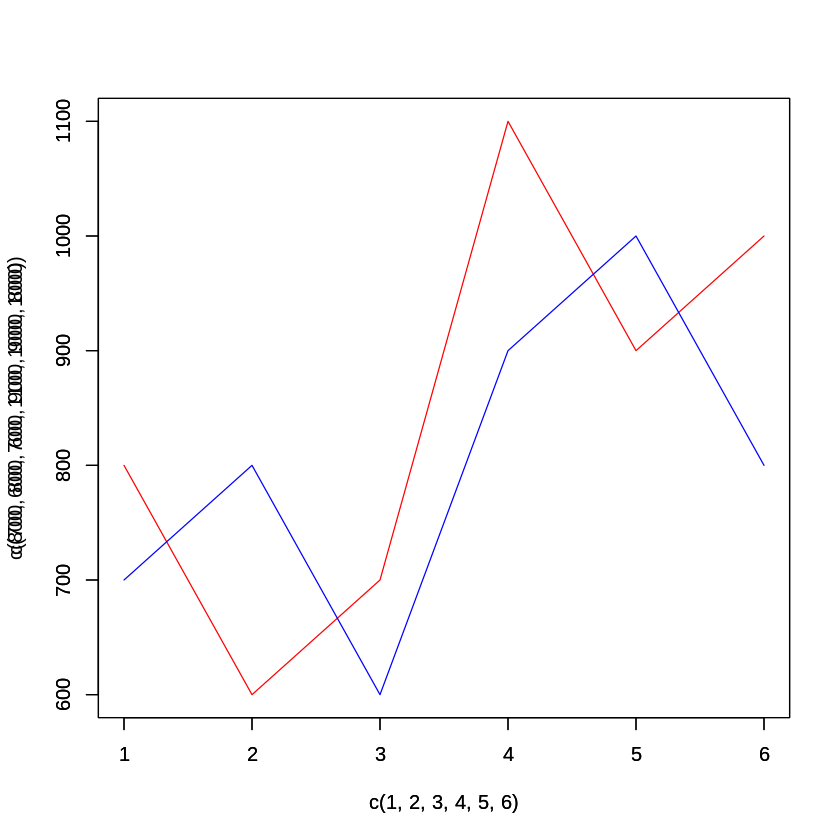

In [24]:
plot(
    c(1,2,3,4,5,6),
    c(800,600,700,1100,900,1000),
    type='l',
    ylim=c(600,1100),
    col='red'
)
par(new=TRUE)
plot(
    c(1,2,3,4,5,6),
    c(700,800,600,900,1000,800),
    type='l',
    ylim=c(600,1100),
    col='blue'
)

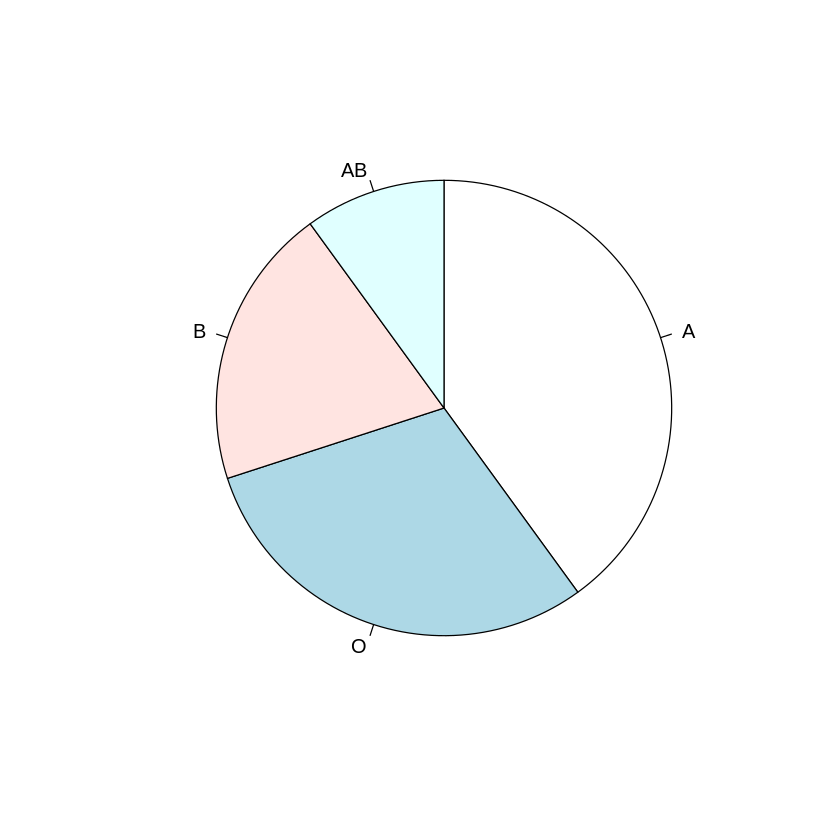

In [27]:
pie(
    c(40,30,20,10),
    labels=c('A','O','B','AB'),
    clockwise=TRUE,
)

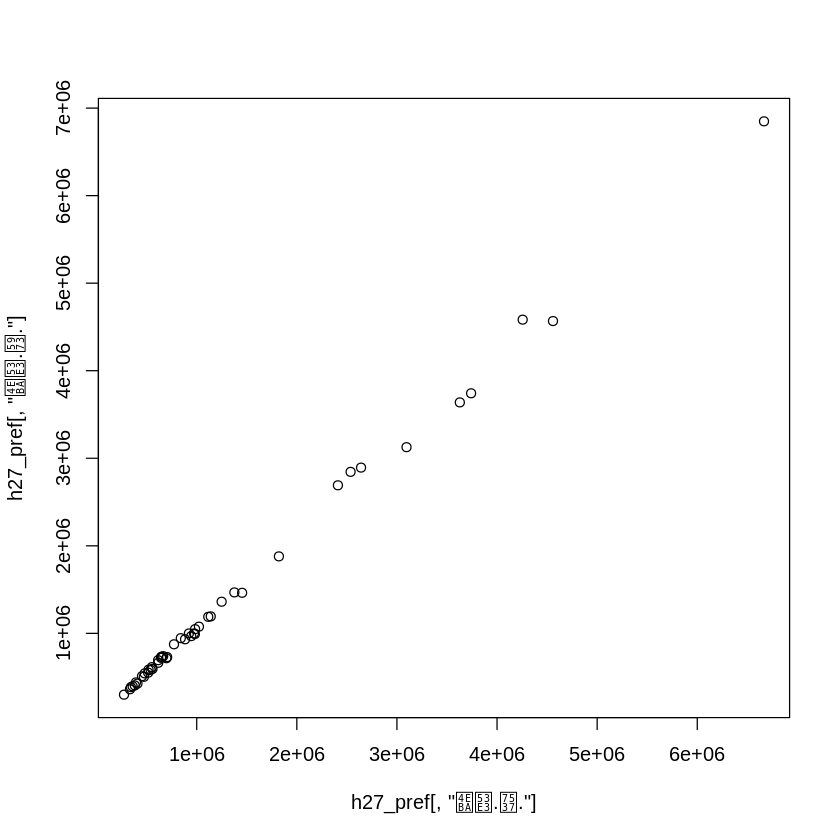

In [28]:
plot(
    h27_pref[,'人口.男.'],
    h27_pref[,'人口.女.']
)

In [29]:
english <- c(80,60,90,70)
math <- c(50,70,40,80)
cov(english,math)

[1] -200

In [30]:
cor(english,math)

[1] -0.8485281

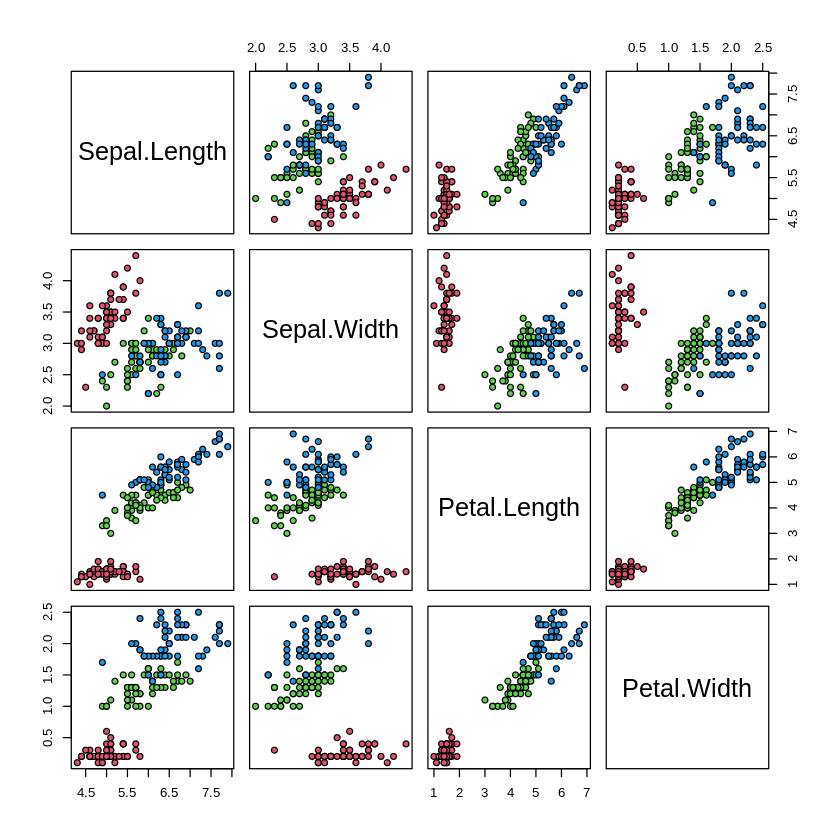

In [32]:
plot(iris[,c(1:4)],pch=21,bg=c(2:4)[unclass(iris$Species)])

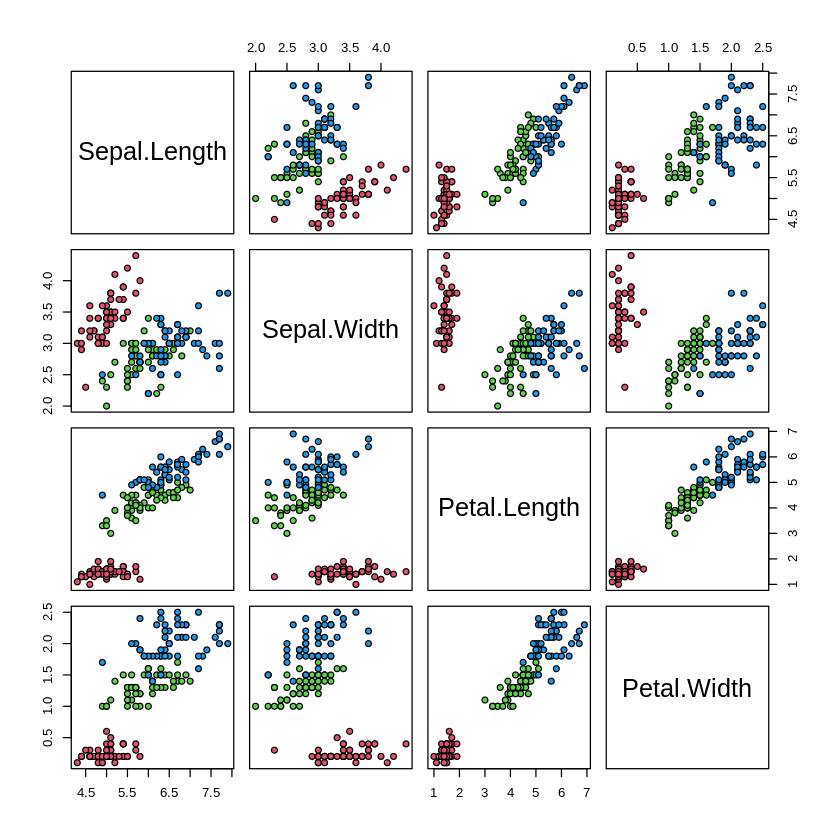

In [33]:
pairs(iris[,c(1:4)],pch=21,bg=c(2:4)[unclass(iris$Species)])

In [34]:
cor(iris[,c(1:4)])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [35]:
environmentName(environment(select))

[1] "dplyr"

In [48]:
environmentName(environment(pairs))

[1] "graphics"

In [52]:
c(2:4)[iris$Species]

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4
[112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[149] 4 4

In [51]:
class(iris$Species)

[1] "factor"

In [55]:
df <- data.frame(
    sex=c(
        '男','女','男','男',
        '女','男','女','女',
        '男','女','女','男'
    ),
    blood_type=c(
        'A','B','A','AB',
        'O','A','A','AB',
        'A','A','O','B'
    )
)
table(df$sex,df$blood_type)

    
     A AB B O
  女 2  1 1 2
  男 4  1 1 0

In [56]:
df_table <- table(df$sex,df$blood_type)
prop.table(df_table)

    
              A         AB          B          O
  女 0.16666667 0.08333333 0.08333333 0.16666667
  男 0.33333333 0.08333333 0.08333333 0.00000000

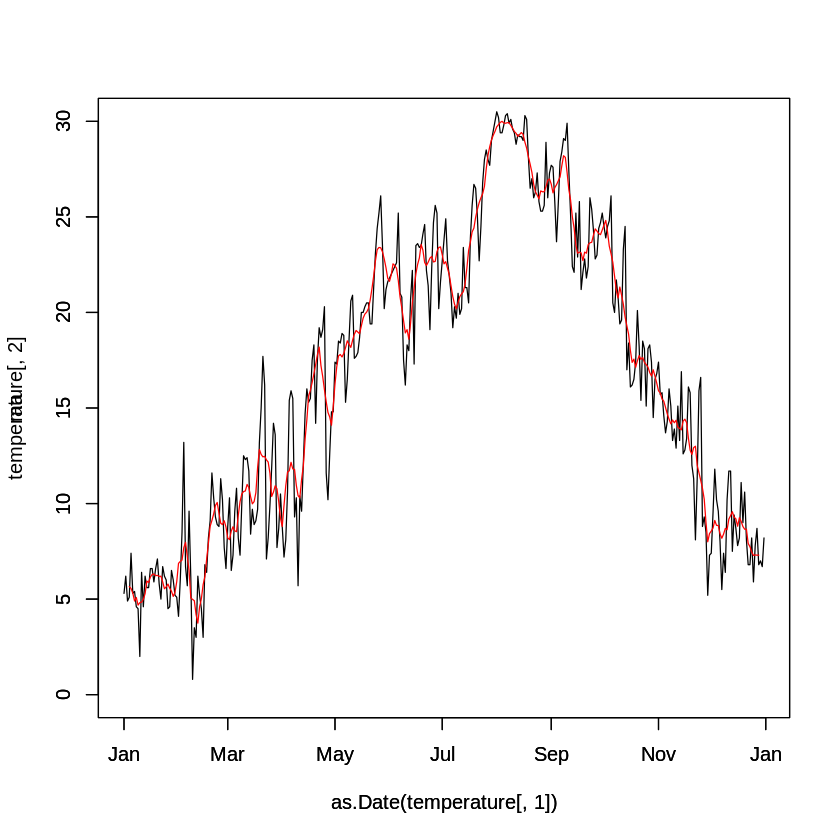

In [65]:
temperature <- read.csv('data/02/temperature.csv')
ma <- stats::filter(temperature[,2],rep(1/7,7))
plot(as.Date(temperature[,1]),temperature[,2],type='l',ylim=c(0,30))
par(new=T)
plot(as.Date(temperature[,1]),ma,type='l',col='red',ylim=c(0,30))

In [66]:
as.integer(runif(10,min=1,max=7))

[1] 6 4 5 4 3 2 2 5 2 5

[1] 6 2 3 4 6 2 6 6 4 4

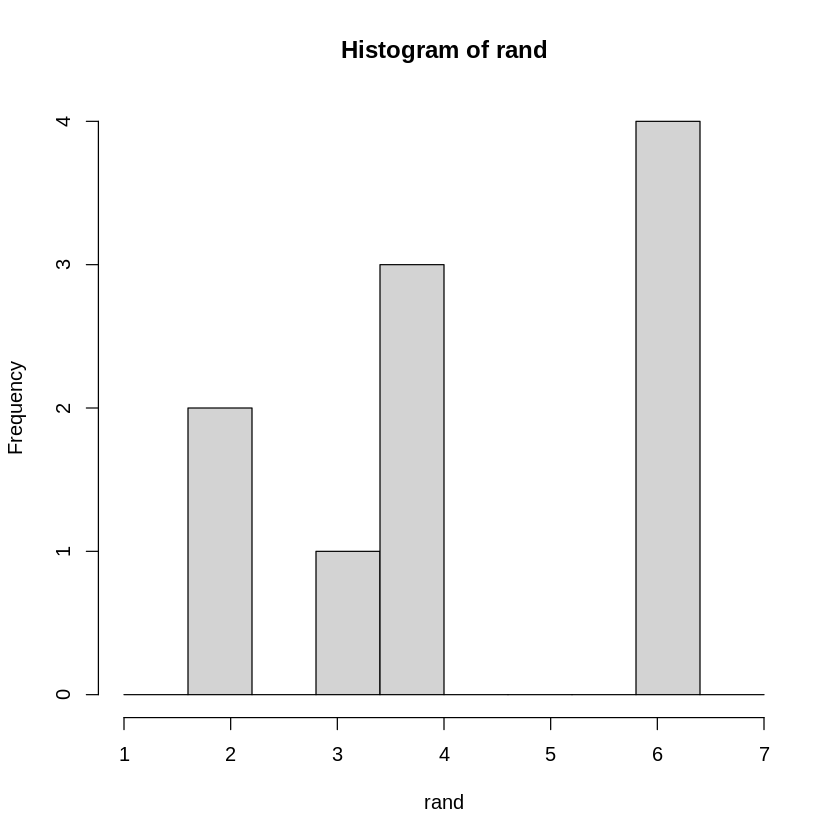

In [77]:
set.seed(0)
rand = as.integer(runif(10,min=1,max=7))
hist(rand,breaks=seq(1,7,0.6))

In [78]:
rnorm(100)

[1] -1.539950042 -0.928567035 -0.294720447 -0.005767173  2.404653389
  [6]  0.763593461 -0.799009249 -1.147657009 -0.289461574 -0.299215118
 [11] -0.411510833  0.252223448 -0.891921127  0.435683299 -1.237538422
 [16] -0.224267885  0.377395646  0.133336361  0.804189510 -0.057106774
 [21]  0.503607972  1.085769362 -0.690953840 -1.284599354  0.046726172
 [26] -0.235706556 -0.542888255 -0.433310317 -0.649471647  0.726750747
 [31]  1.151911754  0.992160365 -0.429513109  1.238304101 -0.279346282
 [36]  1.757903090  0.560746091 -0.452783973 -0.832043296 -1.166570547
 [41] -1.065590580 -1.563782051  1.156536997  0.832047129 -0.227328691
 [46]  0.266137362 -0.376702719  2.441364629 -0.795339117 -0.054877474
 [51]  0.250141323  0.618243294 -0.172623503 -2.223900274 -1.263614385
 [56]  0.358728896 -0.011045478 -0.940649163 -0.115825322 -0.814968709
 [61]  0.242263481 -1.425098395  0.365941123  0.248412649  0.065288182
 [66]  0.019156392  0.257338377 -0.649010078 -0.119168762  0.664135700
 [71]  1.100969102  0.143771481 -0.117753598 -0.912068367 -1.437586241
 [76] -0.797089525  1.254083106  0.772142186 -0.219515627 -0.424810283
 [81] -0.418980099  0.996986861 -0.275778029  1.256018817  0.646674390
 [86]  1.299312303 -0.873262112  0.008370960 -0.880871723  0.596259017
 [91]  0.119717641 -0.282173877  1.455988401  0.229019591  0.996543929
 [96]  0.781859185 -0.776776622 -0.615989908  0.046580303 -1.130385778

In [80]:
data <- data.frame(
    x = c(100000, 10000, 0),
    p = c(0.001, 0.009, 0.99)
)
sum(data$x * data$p)

[1] 190

In [81]:
dice <- data.frame(
    x = c(1, 2, 3, 4, 5, 6),
    p = c(1/6,1/6,1/6,1/6,1/6,1/6)
)
mean = sum(dice$x * dice$p)
sum((dice$x - mean) ** 2 * dice$p)

[1] 2.916667

In [82]:
f <- function(x) {
    ifelse(x < 0,
           0,
           ifelse(x < 1,
                  x,
                  ifelse(x < 2,
                         -x + 2,
                         0
                  )
           )
    )
}
f(c(0, 0.5, 1, 1.5, 2))

[1] 0.0 0.5 1.0 0.5 0.0

In [83]:
integrate(f,0.5,1.5)

0.75 with absolute error < 8.3e-15

In [84]:
integrate(f,-Inf,Inf)

1 with absolute error < 9.2e-05

In [85]:
F <- function(x) {
    integrate(f, -Inf, x)$value
}

In [86]:
F(1.5) - F(0.5)

[1] 0.7499997

In [88]:
calc <- function(x) {
    x * f(x)
}
integrate(calc, -Inf, Inf)$value

[1] 1

In [89]:
ex <- integrate(calc, -Inf, Inf)$value
diff <- function (x) {
    (x - ex) ** 2 * f(x)
}
integrate(diff, -Inf, Inf)$value

[1] 0.1666671

In [90]:
pnorm(1.64)

[1] 0.9494974

In [91]:
qnorm(0.95)

[1] 1.644854

In [92]:
dnorm(1.64)

[1] 0.1039611

In [97]:
dice <- c(1,2,3,4,5,6)
population <- as.integer(runif(1000,min=1,max=7))
var <- var(population)

n=100
sample <- population[as.integer(runif(n,min=1,max=1001))]
m = mean(sample)
z = qnorm(0.95)
print(m - z * sqrt(var / n))
print(m + z * sqrt(var / n))

[1] 3.18954
[1] 3.75046


In [98]:
n <- 20

sample <- as.integer(runif(n, min=1, max=7))
m = mean(sample)
var = var(sample)
z = qt(0.95,n-1)
print(m - z * sqrt(var / n))
print(m + z * sqrt(var / n))

[1] 3.38545
[1] 4.61455


In [1]:
c(qnorm(0.025),qnorm(0.975))

[1] -1.959964  1.959964

In [2]:
data <- c(29.2,29.8,31.2,32.1,28.8,30.1,30.9,29.4,30.7,31.2)
m <- mean(data)
m

[1] 30.34

In [4]:
n <- length(data)
z_value <- (m - 30.0) / sqrt(1.5 / n)
z_value

[1] 0.8778762

In [5]:
p_value <- dnorm(z_value)
p_value

[1] 0.2713701

In [6]:
pnorm(z_value)

[1] 0.8099946

In [7]:
data <- c(25.1,23.9,25.2,24.6,24.3,24.8,23.8)
n <- length(data)
c(qt(0.025,n-1),qt(0.975,n-1))

[1] -2.446912  2.446912

In [8]:
m <- mean(data)
var <- var(data)
c(m,var)

[1] 24.5285714  0.3057143

In [9]:
t_value <- (m - 25.0) / sqrt(var / n)
t_value

[1] -2.255834

In [10]:
p_value <- dt(t_value, n - 1)
p_value

[1] 0.04459962

In [11]:
pt(t_value, n - 1)

[1] 0.03245934

In [12]:
data <- c(25.1,23.9,25.2,24.6,24.3,24.8,23.8)
t.test(data,mu=25,conf.level=0.95)


	One Sample t-test

data:  data
t = -2.2558, df = 6, p-value = 0.06492
alternative hypothesis: true mean is not equal to 25
95 percent confidence interval:
 24.01721 25.03993
sample estimates:
mean of x 
 24.52857 


In [13]:
data <- c(2,11,-2,2,4,4,4,8)
n <- length(data)
qt(0.95,n-1)

[1] 1.894579

In [15]:
m <- mean(data)
var <- var(data)
c(m,var)

[1]  4.12500 15.55357

In [16]:
t_value <- m / sqrt(var / n)
t_value

[1] 2.958379

In [17]:
p_value <- dt(t_value,n-1)
p_value

[1] 0.0150141

In [18]:
pt(t_value,n-1)

[1] 0.9894232

In [19]:
before <- c(80,75,63,88,91,58,67,72)
after <- c(82,86,61,90,95,62,71,80)
t.test(x=before,y=after,paired=T)


	Paired t-test

data:  before and after
t = -2.9584, df = 7, p-value = 0.02115
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.4221007 -0.8278993
sample estimates:
mean of the differences 
                 -4.125 


In [21]:
x_1 <- c(15,18,17,18,19,17,16,20,19,14)
x_2 <- c(17,20,15,18,16,15,17,18)
n_1 <- length(x_1)
n_2 <- length(x_2)
qt(0.95,n_1+n_2-2)

[1] 1.745884

In [22]:
m_1 <- mean(x_1)
m_2 <- mean(x_2)
s_1 <- var(x_1)
s_2 <- var(x_2)
c(m_1,m_2,s_1,s_2)

[1] 17.300000 17.000000  3.566667  2.857143

In [23]:
t_value <- (m_1 - m_2) / sqrt(
    (1/n_1 + 1/n_2) * 
    ((n_1-1)*s_1 + (n_2 - 1)*s_2) /
    (n_1+n_2-2)
)
t_value

[1] 0.3504864

In [24]:
p_value <- dt(t_value,n_1+n_2-2)
p_value

[1] 0.3680401

In [25]:
pt(t_value,n_1+n_2-2)

[1] 0.6347273

In [26]:
x_1 <- c(15,18,17,18,19,17,16,20,19,14)
x_2 <- c(17,20,15,18,16,15,17,18)
t.test(x_1,x_2,var.equal=T)


	Two Sample t-test

data:  x_1 and x_2
t = 0.35049, df = 16, p-value = 0.7305
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.51454  2.11454
sample estimates:
mean of x mean of y 
     17.3      17.0 


In [27]:
c(qchisq(0.05,9),qchisq(0.95,9))

[1]  3.325113 16.918978

In [28]:
data <- c(31,42,29,51,45,42,37,48,39,50)
n <- length(data)
chi_value <- (n-1)*var(data)/30
chi_value

[1] 17.01333

In [29]:
a <- c(1400,1800,1100,2500,1300,2200,1900,1600)
b <- c(1500,1800,2200,1200,2000,1700)
n_1 <- length(a)
n_2 <- length(b)
c(qf(0.05,n_1-1,n_2-1),qf(0.95,n_1-1,n_2-1))

[1] 0.2517926 4.8758717

In [30]:
s_a <- var(a)
s_b <- var(b)
f_value <- s_a / s_b
f_value

[1] 1.753759

In [31]:
var.test(a,b)


	F test to compare two variances

data:  a and b
F = 1.7538, num df = 7, denom df = 5, p-value = 0.5551
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2559084 9.2690338
sample estimates:
ratio of variances 
          1.753759 


In [32]:
c(qchisq(0.025,1),qchisq(0.975,1))

[1] 0.0009820691 5.0238861873

In [33]:
m <- matrix(c(5,7,6,2),nrow=2,byrow=F)
chisq.test(m,correct=F)

Warning message in chisq.test(m, correct = F):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  m
X-squared = 2.1549, df = 1, p-value = 0.1421


In [34]:
c(qchisq(0.05,6),qchisq(0.95,6))

[1]  1.635383 12.591587

In [35]:
data <- c(31,16,14,15,13,22,29)
m <- mean(data)
chi_value <- sum((data - m) ** 2 / m)
chi_value

[1] 16.6

In [36]:
chisq.test(c(31,16,14,15,13,22,29))


	Chi-squared test for given probabilities

data:  c(31, 16, 14, 15, 13, 22, 29)
X-squared = 16.6, df = 6, p-value = 0.01087


In [38]:
data <- c(31,16,14,15,13,22,29)
expected <- c(30,15,15,15,15,20,40)
chi_value <- sum((data - expected) ** 2 / expected)
chi_value

[1] 3.658333

In [39]:
chisq.test(
    c(31,16,14,15,13,22,29),
    p=c(30,15,15,15,15,20,40)/150
)


	Chi-squared test for given probabilities

data:  c(31, 16, 14, 15, 13, 22, 29)
X-squared = 3.2054, df = 6, p-value = 0.7827


In [1]:
x_1 <- c(15,18,17,18,19,17,16,20,19,14)
x_2 <- c(17,20,15,18,16,15,17,18)
s_1 <- var(x_1)
s_2 <- var(x_2)
n_1 <- length(x_1)
n_2 <- length(x_2)
nu <- (s_1 / n_1 + s_2 / n_2) ** 2 / ((s_1 / n_1) ** 2 / (n_1 - 1) + (s_2 / n_2) ** 2 / (n_2 - 1))
nu

[1] 15.74737

In [2]:
qt(0.95,16)

[1] 1.745884

In [3]:
m_1 <- mean(x_1)
m_2 <- mean(x_2)
t <- (m_1 - m_2) / sqrt(s_1 / n_1 + s_2 / n_2)
t

[1] 0.3550832

In [4]:
t.test(x_1,x_2)


	Welch Two Sample t-test

data:  x_1 and x_2
t = 0.35508, df = 15.747, p-value = 0.7272
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.493388  2.093388
sample estimates:
mean of x mean of y 
     17.3      17.0 


In [5]:
x <- c(15,21,22,24,25,27,28,29,30)
y <- c(80,100,95,120,128,140,141,150,160)
lm(y ~ x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    -13.054        5.572  


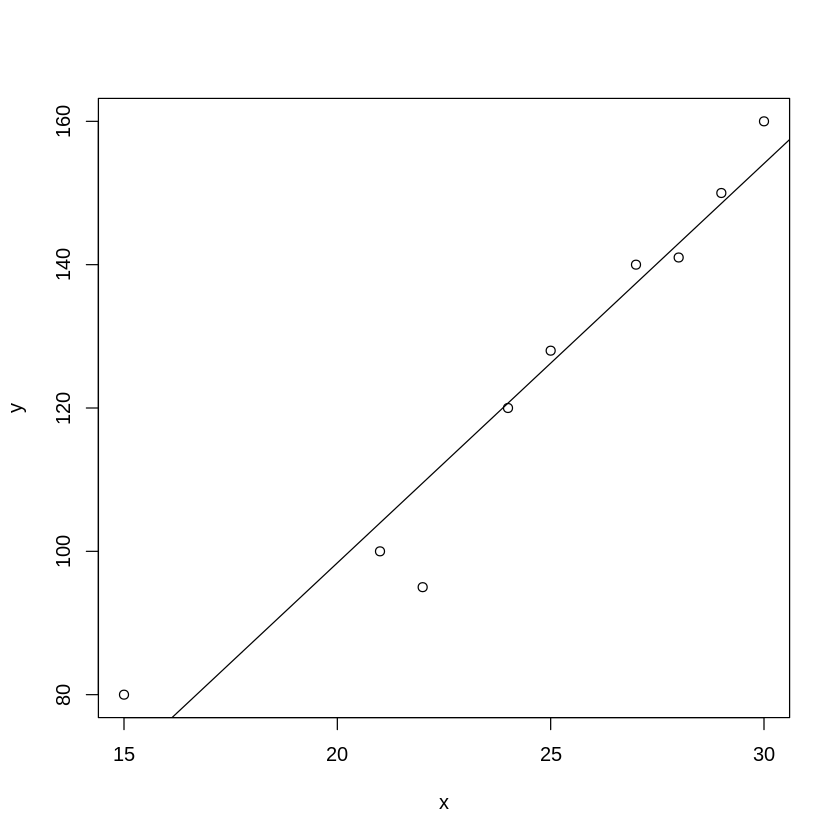

In [6]:
x <- c(15,21,22,24,25,27,28,29,30)
y <- c(80,100,95,120,128,140,141,150,160)
z <- lm(y ~ x)
plot(x,y)
abline(z)

In [7]:
summary(lm(y ~ x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.537  -1.971   1.456   2.601   9.469 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.0536    13.5468  -0.964    0.367    
x             5.5723     0.5428  10.265  1.8e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.247 on 7 degrees of freedom
Multiple R-squared:  0.9377,	Adjusted R-squared:  0.9288 
F-statistic: 105.4 on 1 and 7 DF,  p-value: 1.8e-05


In [8]:
x <- c(15,21,22,24,25,27,28,29,30)
y <- c(80,100,95,120,128,140,141,150,160)
x_mean <- mean(x)
y_mean <- mean(y)
sum_xy <- sum((x - x_mean) * (y - y_mean))
sum_xx <- sum((x - x_mean) ** 2)
a <- sum_xy / sum_xx
b <- y_mean - a * x_mean
print(c(a,b))

[1]   5.572319 -13.053616


In [10]:
f <- function (x) {
    return (5.572 * x + -13.054)
}
x <- c(15,21,22,24,25,27,28,29,30)
y <- c(80,100,95,120,128,140,141,150,160)
mean_y <- mean(y)
sum_data <- sum((y - mean_y) ** 2)
sum_predict <- sum((f(x) - mean_y) ** 2)
sum_predict / sum_data

[1] 0.9376

In [11]:
distance <- c(
    31438,13845,43095,40946,
    82375,78764,90554,69142,
    23712,51489,60023,80123
)
year <- c(3,3,5,4,5,6,7,8,5,6,10,2)
price <- c(125,140,98,113,65,70,55,80,95,88,90,132)
lm(price ~ distance + year)


Call:
lm(formula = price ~ distance + year)

Coefficients:
(Intercept)     distance         year  
  1.572e+02   -5.112e-04   -6.169e+00  


In [12]:
summary(lm(price ~ distance + year))


Call:
lm(formula = price ~ distance + year)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.214 -10.592  -2.197   7.750  28.129 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.572e+02  1.508e+01  10.424 2.53e-06 ***
distance    -5.112e-04  2.187e-04  -2.338   0.0442 *  
year        -6.169e+00  2.432e+00  -2.536   0.0319 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.1 on 9 degrees of freedom
Multiple R-squared:  0.6726,	Adjusted R-squared:  0.5999 
F-statistic: 9.246 on 2 and 9 DF,  p-value: 0.006572


In [13]:
data <- data.frame(
    malfunction = c(1,1,1,1,1,0,0,0,0,0),
    temperature = c(25.0,27.1,28.2,32.3,33.8,25.3,24.7,26.3,28.2,27.6),
    humidity = c(80,65,64,72,82,45,52,60,70,49),
    frequency = c(5,3,6,4,4,2,1,3,1,4)
)
model <- glm(malfunction ~ temperature + humidity + frequency, family=binomial,data=data)
summary(model)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = malfunction ~ temperature + humidity + frequency, 
    family = binomial, data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.111e-05  -2.110e-08   0.000e+00   2.110e-08   2.133e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -8.836e+02  1.398e+08       0        1
temperature  1.120e+01  8.152e+06       0        1
humidity     7.094e+00  1.304e+06       0        1
frequency    4.707e+01  1.225e+06       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3863e+01  on 9  degrees of freedom
Residual deviance: 9.6547e-10  on 6  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25
